In [15]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random

# SKLearn related imports
import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import preprocessing

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin

# NLTK Text Processing package
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

# GenSim
import gensim

In [4]:
# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format('./lexvec.enwiki+newscrawl.300d.W.pos.vectors')

In [5]:
model.wv.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.6212160587310791),
 ('monarch', 0.5939740538597107),
 ('prince', 0.5655953884124756),
 ('throne', 0.5191947817802429),
 ('princess', 0.5010462403297424),
 ('emperor', 0.4941236674785614),
 ('consort', 0.474475622177124),
 ('empress', 0.4712255299091339),
 ('regent', 0.46504777669906616),
 ('betrothed', 0.4598500430583954)]

In [6]:
df = pd.read_csv('../data/uci-news-aggregator.csv')
df.dtypes

ID            int64
TITLE        object
URL          object
PUBLISHER    object
CATEGORY     object
STORY        object
HOSTNAME     object
TIMESTAMP     int64
dtype: object

In [7]:
df = df[['TITLE', 'CATEGORY']]
df.columns = ['title', 'category']
df.head()

,title,category
0,"Fed official says weak data caused by weather,...",b
1,Fed's Charles Plosser sees high bar for change...,b
2,US open: Stocks fall after Fed official hints ...,b
3,"Fed risks falling 'behind the curve', Charles ...",b
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b


In [8]:
sample_idxs = random.sample(range(1, 400000), 2500)

In [9]:
# Extract document tokens
documents = df['title'].values[sample_idxs]
tokens = [[word for word in document.split()] for document in documents]

In [10]:
# Convert tokens into vector representation
vectors = [np.array([model.wv[token] if token in model.wv else model.wv['the'] for token in sentence]) for sentence in tokens]

In [11]:
# Average word vectors to get document representation
means = [document.mean(axis=0) for document in vectors]

In [12]:
# Convert list of document representations into matrix
array = np.array(means)
array.shape

(2500, 300)

In [13]:
labels = df['category'].values[sample_idxs]

color_map = {'b':'r', 't':'g', 'e':'b', 'm':'c'}
colors = [color_map[label] for label in labels]
size = [10 for i in range(len(labels))]

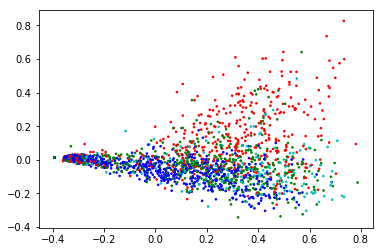

In [19]:
reduced_data = PCA(n_components=2).fit_transform(array)

plt.scatter(reduced_data[:,0], reduced_data[:,1], marker='.', c=colors, s=size)

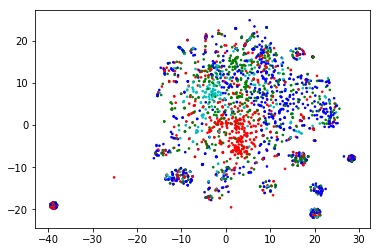

In [16]:
reduced_data = TSNE(n_components=2).fit_transform(array)

plt.scatter(reduced_data[:,0], reduced_data[:,1], marker='.', c=colors, s=size)

In [50]:
df['category'].unique()

array(['b', 't', 'e', 'm'], dtype=object)